# AirBnB Price prediction

In [83]:
import pandas as pd
import numpy as np
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

In [84]:
# load data set
dc_listings = pd.read_csv('data/airbnb_listings.csv')
dc_listings['bed_type'].value_counts()

Real Bed         3570
Futon              55
Pull-out Sofa      48
Airbed             37
Couch              13
Name: bed_type, dtype: int64

In [93]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# load data set
dc_listings = pd.read_csv('data/airbnb_listings.csv')


one_hot_features = ['bed_type', 'property_type']
features = ['accommodates','bedrooms','bathrooms', 'number_of_reviews', 'cleaning_fee', 'monthly_price']
target = 'price'

# make all one hot features strings
for feature in one_hot_features:
    dc_listings[feature] = dc_listings[feature].astype(str)

# make price an integer (remove extra characters)
dc_listings['price'] = dc_listings['price'].str.replace("\$|,",'')
dc_listings['cleaning_fee'] = dc_listings['cleaning_fee'].str.replace("\$|,",'')
dc_listings['weekly_price'] = dc_listings['weekly_price'].str.replace("\$|,",'')
dc_listings['monthly_price'] = dc_listings['monthly_price'].str.replace("\$|,",'')

# make all features a float
for feature in features + [target]:
    if feature not in one_hot_features:
        dc_listings[feature] = dc_listings[feature].astype(float)

dc_listings[features + [target]].describe()

# perform one hot encoding
for feature in one_hot_features: 
    one_hot_enc = OneHotEncoder(categories='auto', drop='first')   
    one_hot_encoded = one_hot_enc.fit_transform(dc_listings[f'{feature}'].values.reshape(-1,1)).toarray()
    
    # convert back to data frame
    df_one_hot = pd.DataFrame(one_hot_encoded, columns = [f"{feature}_"+str(int(i)) for i in range(one_hot_encoded.shape[1])])
    dc_listings = pd.concat([dc_listings, df_one_hot], axis=1)
    features.extend([f"{feature}_"+str(int(i)) for i in range(one_hot_encoded.shape[1])])
    
# drop any NaN values
dc_listings = dc_listings.dropna(subset=features + [target])

#print(features)
#print(dc_listings[features].describe())
#print(dc_listings.columns)
#print(dc_listings['property_type'].value_counts())
print(dc_listings.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'property_type_1', 'property_type_2', 'property_type_3',
       'property_type_4', 'property_type_5', 'property_type_6',
       'property_type_7', 'property_type_8', 'property_type_9',
       'property_type_10'],
      dtype='object', length=107)


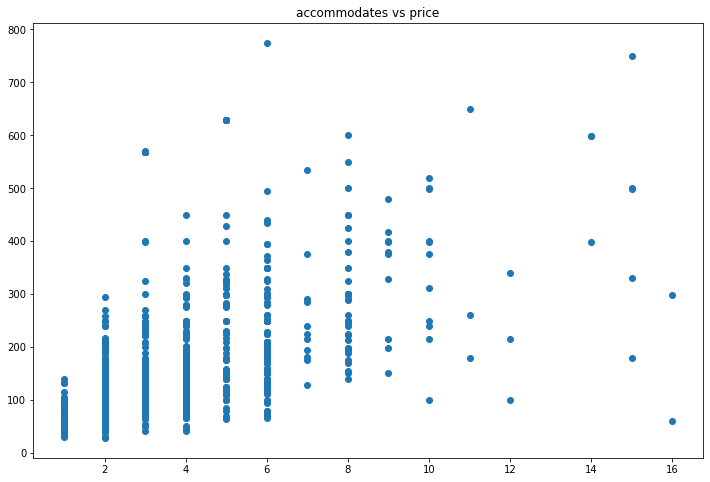

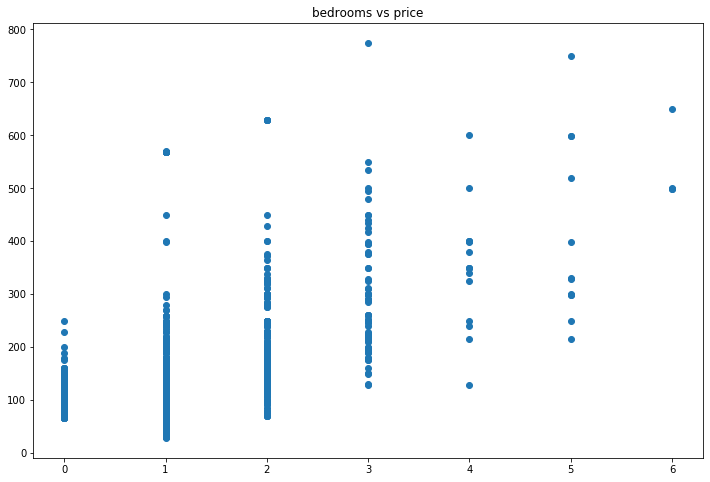

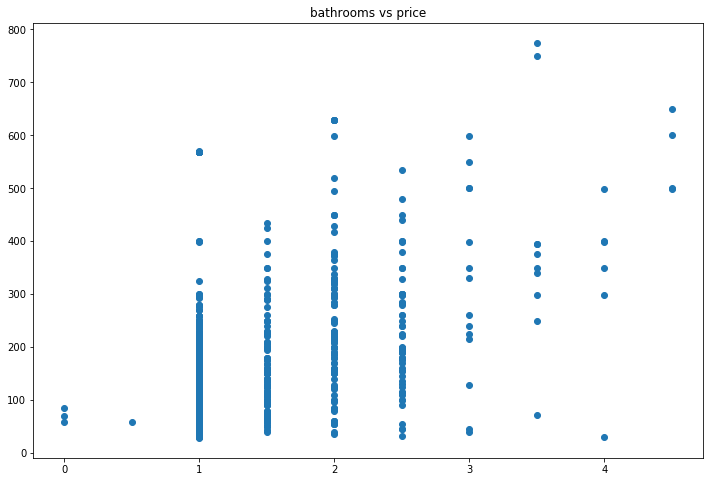

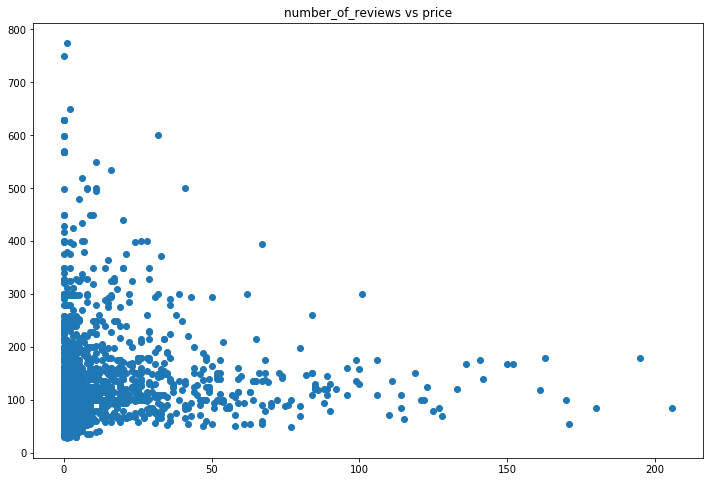

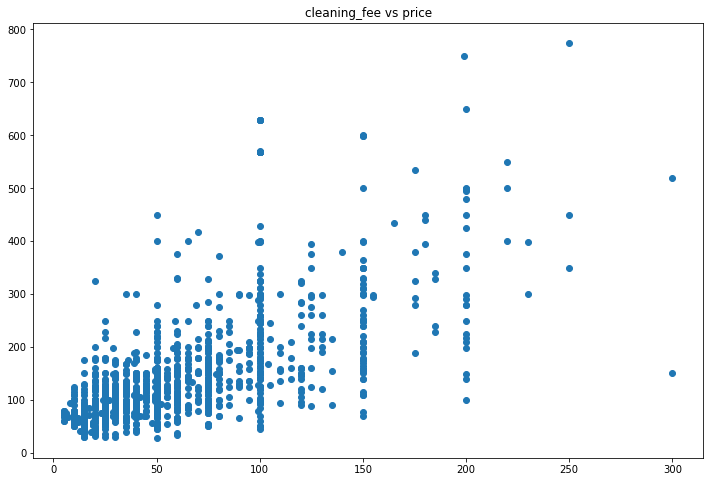

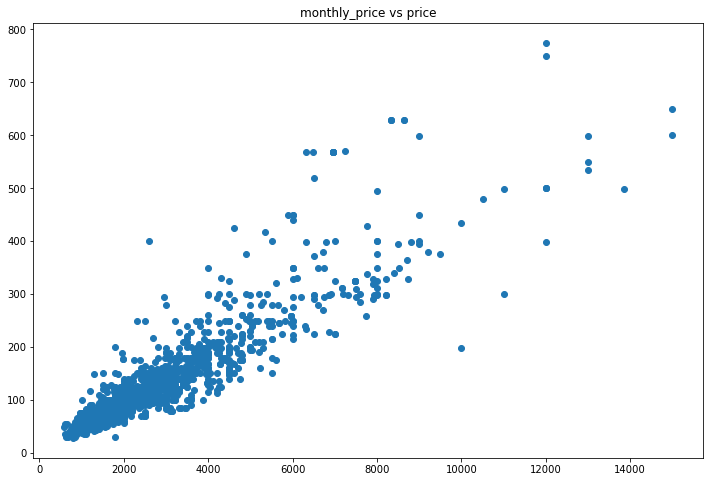

In [92]:
# Plot some data
for f in ['accommodates','bedrooms','bathrooms', 'number_of_reviews', 'cleaning_fee', 'monthly_price']:
    plt.scatter(dc_listings[f], dc_listings[target])
    plt.title(f'{f} vs {target}')
    plt.show()

In [94]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


# Split into test and training set
train, test = train_test_split(dc_listings, test_size=0.2)
feature_train = train[features]
target_train = train[target]
feature_test = test[features]
target_test = test[target]

# learn and perform scaling
feature_scaler = RobustScaler().fit(feature_train)
feature_train = feature_scaler.transform(feature_train)
feature_test = feature_scaler.transform(feature_test)

In [98]:
#from sklearn.neighbors import KNeighborsRegressor
#model = KNeighborsRegressor()
#model.fit(feature_train, target_train)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(feature_train, target_train)

#from sklearn import ensemble
#model = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2, learning_rate=0.1, loss='ls')
#model.fit(feature_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
# Evaluation
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(target_test, model.predict(feature_test)) ** (1/2)
print(f'RMSE: {mse}')

print(f'Score: {model.score(feature_test, target_test)}')

RMSE: 41.30052651051517
Score: 0.8085222554373801
